In [69]:
import pandas as pd
import numpy as np

In [70]:
data = pd.read_csv("../datasets/diamonds/diamonds.csv")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,Ideal,H,SI2,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,Ideal,H,SI1,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,Premium,I,SI1,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,Ideal,F,SI1,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,Very Good,F,VS2,61.7,57.0,4493,6.17,6.21,3.82


In [5]:
data2 = data[(data['z']>0) & (data['price']>0)].reset_index(drop= True)

In [7]:
data2.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
4984,0.38,Ideal,H,VVS2,62.3,53.3,832,4.65,4.69,2.91
4985,0.33,Premium,G,VVS2,61.3,59.0,927,4.45,4.42,2.72
4986,1.25,Ideal,J,VVS2,62.1,56.0,5980,6.81,6.84,4.24
4987,0.31,Premium,F,VS2,62.9,58.0,802,4.31,4.27,2.70
4988,0.30,Ideal,H,VVS1,61.2,57.0,655,4.30,4.39,2.66


In [8]:
data_for_model = data2[['carat', 'color', 'clarity', 'price']]

In [9]:
cath_columns = list(data_for_model.select_dtypes(include=[object]).columns)
print(cath_columns)
num_columns = list(data_for_model.select_dtypes(exclude=[object]).columns)
print(num_columns)

['color', 'clarity']
['carat', 'price']


In [11]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

encoded_columns = encoder.fit_transform(data_for_model[cath_columns]).toarray()

# Create a dataframe from the encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(cath_columns))

# Concatenate the encoded dataframe with the original dataframe
data_for_model_encoded = pd.concat([data_for_model[num_columns], encoded_df], axis=1)

data_for_model_encoded.tail()

,carat,price,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
4984,0.38,832,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4985,0.33,927,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4986,1.25,5980,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4987,0.31,802,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4988,0.30,655,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
data_for_model_encoded = data_for_model_encoded.apply(lambda x: np.log(x) if x.name in num_columns else x)
data_for_model_encoded.rename(columns = {'carat':'log_carat', 'price': 'log_price'}, inplace = True)
data_for_model_encoded.tail()

,log_carat,log_price,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
4984,-0.967584,6.723832,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4985,-1.108663,6.831954,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4986,0.223144,8.696176,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4987,-1.171183,6.687109,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4988,-1.203973,6.484635,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
from sklearn.model_selection import train_test_split

X = data_for_model_encoded.drop(['log_price'], axis = 1)
y = data_for_model_encoded['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
model.coef_

array([ 1.86869096e+00, -5.60963598e+12, -5.60963598e+12, -5.60963598e+12,
       -5.60963598e+12, -5.60963598e+12, -5.60963598e+12, -5.60963598e+12,
        7.20383425e+12,  7.20383425e+12,  7.20383425e+12,  7.20383425e+12,
        7.20383425e+12,  7.20383425e+12,  7.20383425e+12,  7.20383425e+12])

In [16]:
model.intercept_

-1594198264818.5552

In [17]:
X_train

,log_carat,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1109,0.019803,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4872,0.019803,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3285,-1.078810,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1198,0.277632,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4746,-0.105361,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,0.239017,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4722,0.405465,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3340,0.009950,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3064,0.463734,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [19]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.9818259697196251

In [20]:
X_test.iloc[0:2]

,log_carat,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
3867,0.698135,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1715,-0.941609,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
model.predict(X_test.iloc[0:2])

array([9.67529297, 6.88134766])

In [22]:
0.698135*model.coef_[0] + 1.0*(model.coef_[6]) + 1.0*(model.coef_[13])+ model.intercept_

9.67529296875

In [23]:
model.predict(np.array([[0.698135, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0]]))

c:\Users\Acer\Dropbox\Scripts\diamonds-assignment\challenge2\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.67529297])

In [24]:
model.score(X_test, y_test)

0.9818259697196251

In [25]:
color_range = 1, 8
clarity_range = 8, 16

In [26]:
table = []
for clarity in range(*clarity_range):
  colors = []
  for color in range(*color_range):
    intercept = (model.coef_[color]) + (model.coef_[clarity])+ model.intercept_
    colors.append(intercept)
  table.append(colors)
cutlast = np.vectorize(lambda texto : texto[texto.find("_")+1:])
table_cols = cutlast(model.feature_names_in_[slice(*color_range)])
table_idxs = cutlast(model.feature_names_in_[slice(*clarity_range)])
intercepts = pd.DataFrame(table, columns = table_cols, index = table_idxs)
intercepts

,D,E,F,G,H,I,J
I1,7.970215,7.912598,7.868652,7.803223,7.712402,7.598145,7.470215
IF,9.111816,9.054199,9.010254,8.944824,8.854004,8.739746,8.611816
SI1,8.571777,8.514160,8.470215,8.404785,8.313965,8.199707,8.071777
SI2,8.416504,8.358887,8.314941,8.249512,8.158691,8.044434,7.916504
VS1,8.814941,8.757324,8.713379,8.647949,8.557129,8.442871,8.314941
VS2,8.742676,8.685059,8.641113,8.575684,8.484863,8.370605,8.242676
VVS1,9.010254,8.952637,8.908691,8.843262,8.752441,8.638184,8.510254
VVS2,8.956543,8.898926,8.854980,8.789551,8.698730,8.584473,8.456543


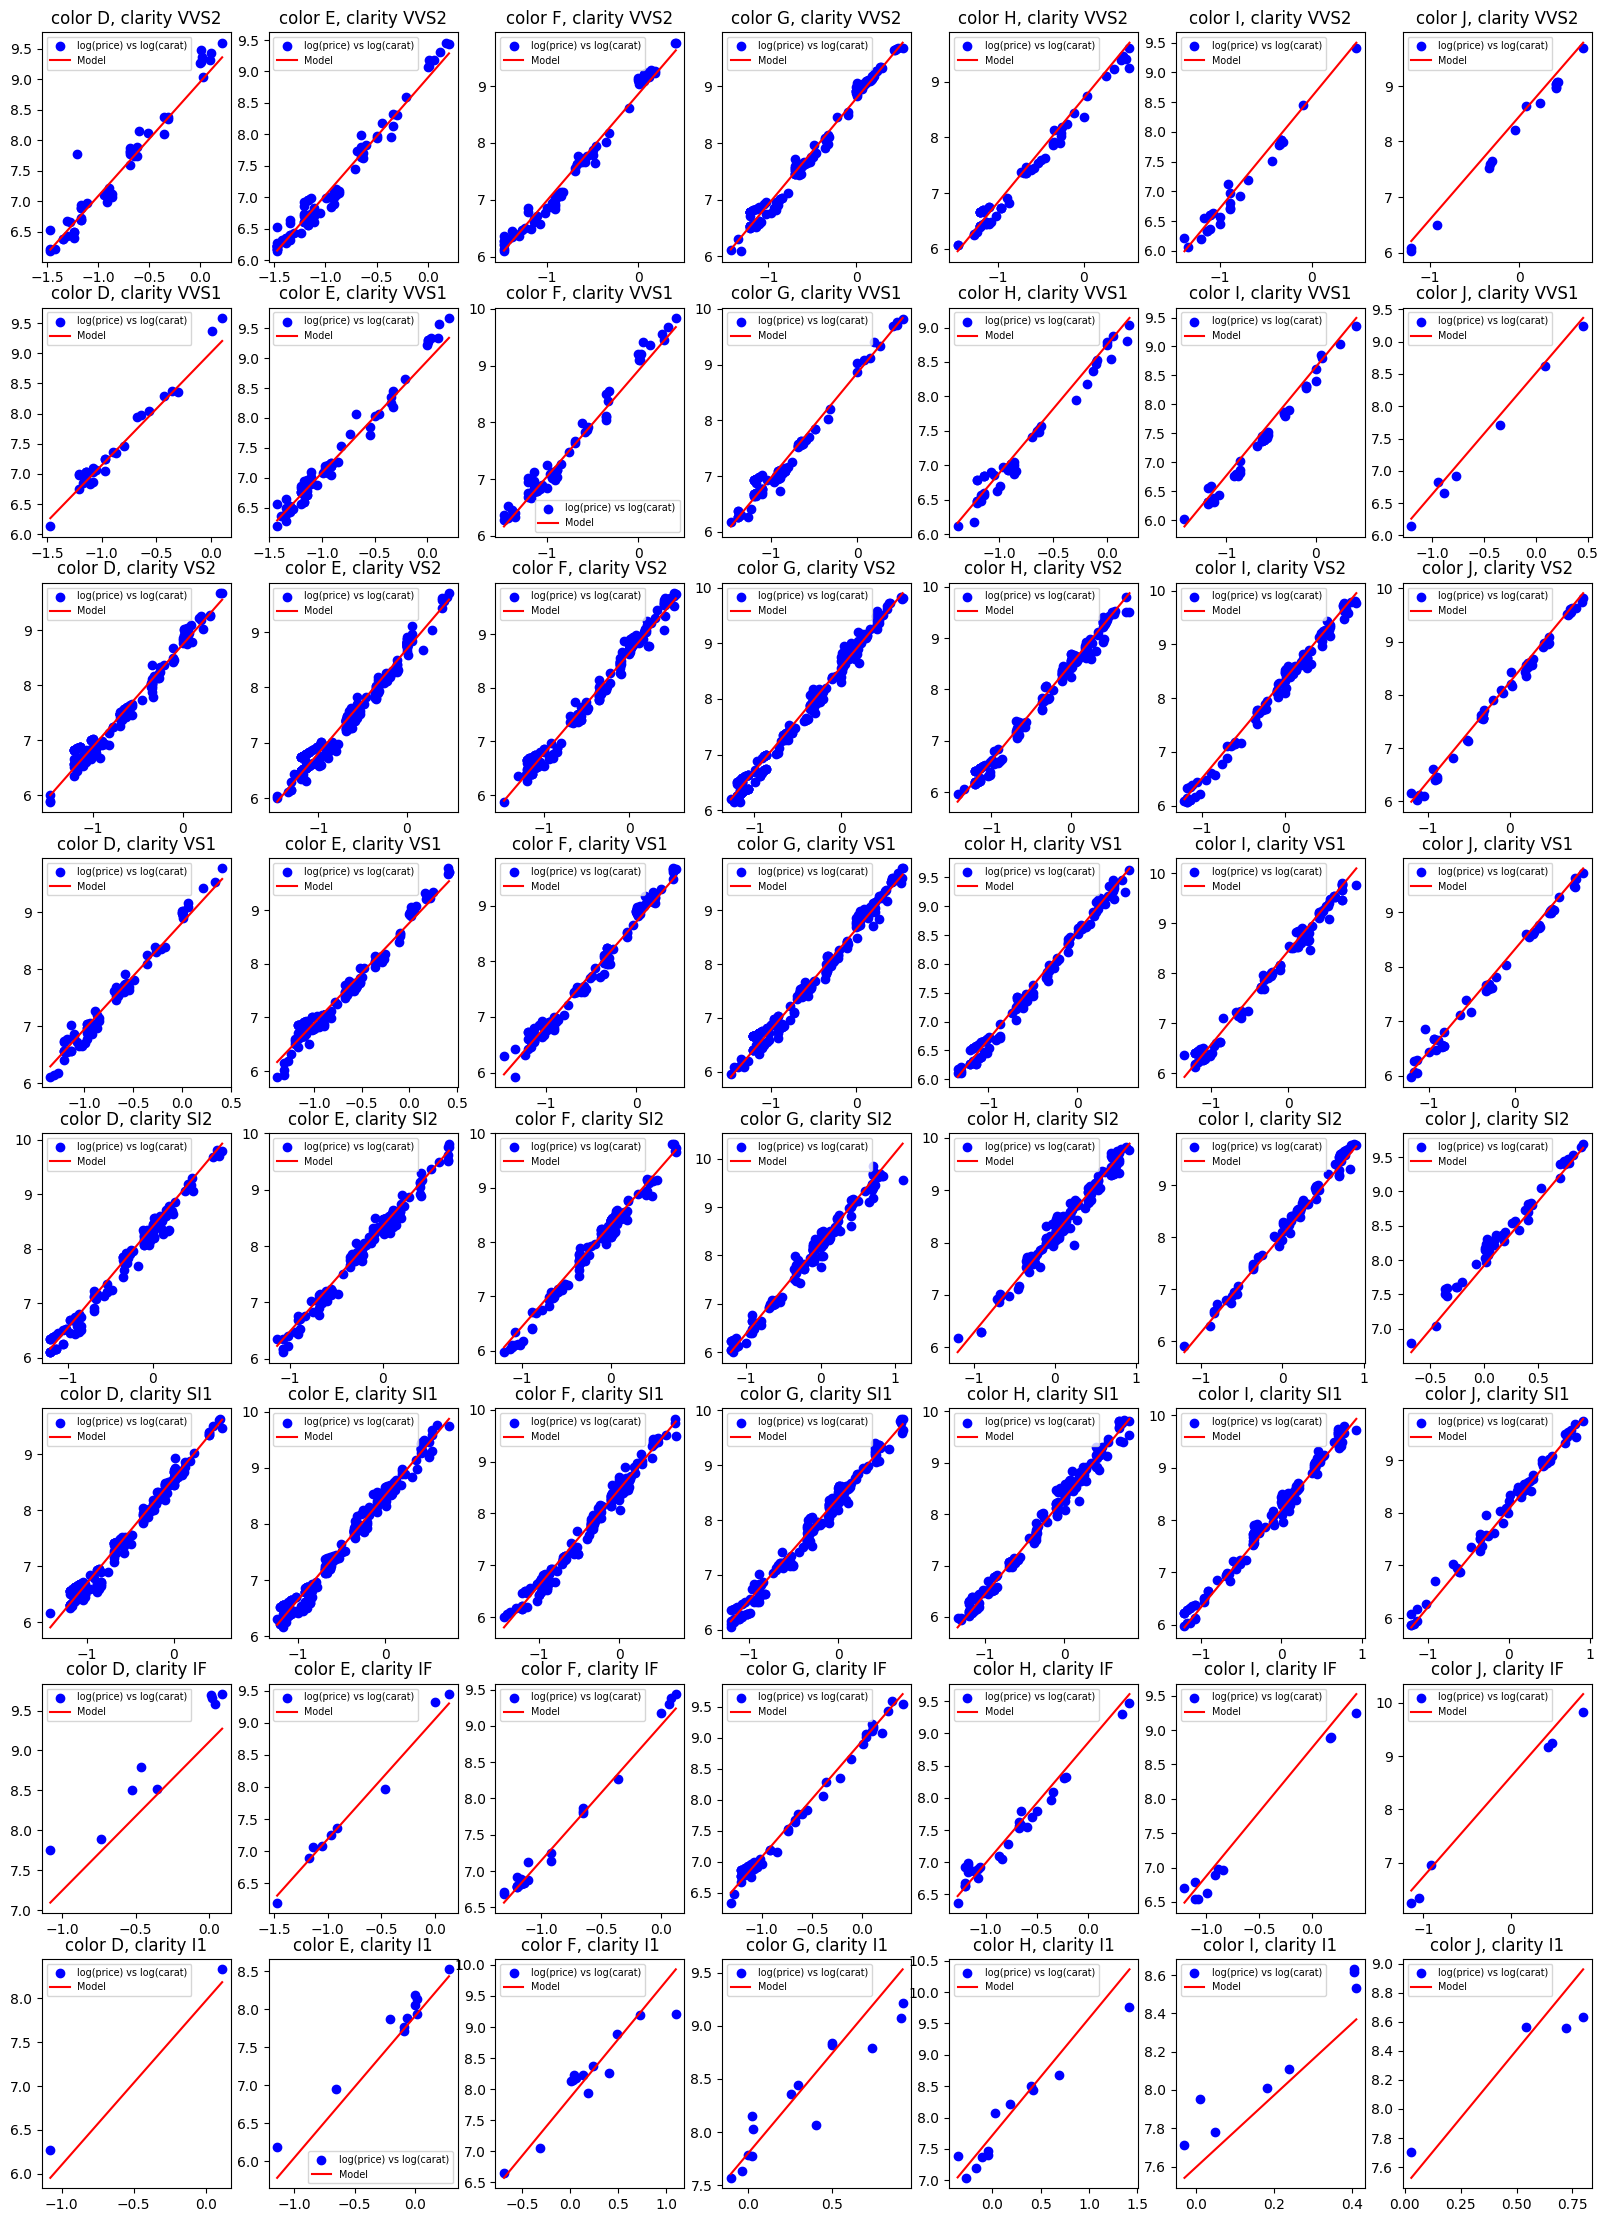

In [28]:
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = 20, 28
rcParams['legend.fontsize'] = 'x-small'
rcParams['figure.titlesize'] = 'medium'

figure, axis = plt.subplots(8, 7)


for num_cla, clarity in enumerate(np.flip(table_idxs)):
  for num_col, color in enumerate(table_cols):

    data_points = data_for_model[(data_for_model['clarity']==clarity) & (data_for_model['color']==color)]
    x = np.linspace(min(np.log(data_points['carat'])), max(np.log(data_points['carat'])), 1000)
    axis[num_cla, num_col].set_title(f"color {color}, clarity {clarity}")
    axis[num_cla, num_col].scatter(x= np.log(data_points['carat']), y = np.log(data_points['price']), c = 'blue', label = 'log(price) vs log(carat)')
    axis[num_cla, num_col].plot(x, model.coef_[0]*x+intercepts[color][clarity], c = 'red', label = 'Model')
    axis[num_cla, num_col].legend()



In [30]:
np.exp(max(intercepts.max())-min(intercepts.min()))

5.1634324534488085

In [33]:
model.feature_names_in_

array(['log_carat', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H',
       'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'], dtype=object)

In [40]:
data_for_model.head()

,carat,color,clarity,price
0,1.10,H,SI2,4733
1,1.29,H,SI1,6424
2,1.20,I,SI1,5510
3,1.50,F,SI1,8770
4,0.90,F,VS2,4493


In [57]:
table_R2 = []
table_len = []
for num_cla, clarity in enumerate(np.flip(table_idxs)):
  colors_R2 = []
  colors_len = []
  for num_col, color in enumerate(table_cols):

    data_points = data_for_model[(data_for_model['clarity']==clarity) & (data_for_model['color']==color)]
    data_points_y_pred = model.coef_[0]*np.log(data_points['carat'])+intercepts[color][clarity]
    data_points_y_test = np.log(data_points['price'])
    colors_R2.append(r2_score(data_points_y_test, data_points_y_pred))
    colors_len.append(len(data_points))


  table_R2.append(colors_R2)
  table_len.append(colors_len)
R2s = pd.DataFrame(table_R2, columns = table_cols, index = table_idxs)
lens = pd.DataFrame(table_len, columns = table_cols, index = table_idxs)
R2s

    
    

,D,E,F,G,H,I,J
I1,0.945840,0.970487,0.977962,0.985430,0.975607,0.959978,0.968921
IF,0.963461,0.970856,0.974492,0.970161,0.965744,0.967931,0.984635
SI1,0.972553,0.973487,0.984207,0.988324,0.987488,0.989371,0.990381
SI2,0.978398,0.974781,0.981654,0.985556,0.989382,0.985346,0.986347
VS1,0.979376,0.982801,0.979016,0.976537,0.960434,0.981849,0.941350
VS2,0.979363,0.982263,0.981594,0.983474,0.985170,0.981940,0.984889
VVS1,0.631950,0.981568,0.986559,0.990246,0.956947,0.967021,0.970401
VVS2,0.941814,0.878032,0.834842,0.780216,0.873203,0.662389,0.628714


In [67]:
lens

,D,E,F,G,H,I,J
I1,50,83,83,140,64,28,16
IF,29,68,59,91,46,45,7
SI1,138,238,201,237,152,111,54
SI2,73,114,121,228,118,100,47
VS1,135,150,145,142,145,76,50
VS2,171,244,195,183,196,138,64
VVS1,9,9,26,60,29,11,6
VVS2,2,11,13,14,12,8,4


In [68]:
len(data_for_model)

4989

In [56]:
R2s > 0.9

,D,E,F,G,H,I,J
I1,True,True,True,True,True,True,True
IF,True,True,True,True,True,True,True
SI1,True,True,True,True,True,True,True
SI2,True,True,True,True,True,True,True
VS1,True,True,True,True,True,True,True
VS2,True,True,True,True,True,True,True
VVS1,False,True,True,True,True,True,True
VVS2,True,False,False,False,False,False,False


In [31]:
table = []
for clarity in range(*clarity_range):
  colors = []
  for color in range(*color_range):
    
    
    intercept = (model.coef_[color]) + (model.coef_[clarity])+ model.intercept_
    colors.append(intercept)
  table.append(colors)
cutlast = np.vectorize(lambda texto : texto[texto.find("_")+1:])
table_cols = cutlast(model.feature_names_in_[slice(*color_range)])
table_idxs = cutlast(model.feature_names_in_[slice(*clarity_range)])
intercepts = pd.DataFrame(table, columns = table_cols, index = table_idxs)
intercepts

,D,E,F,G,H,I,J
I1,7.970215,7.912598,7.868652,7.803223,7.712402,7.598145,7.470215
IF,9.111816,9.054199,9.010254,8.944824,8.854004,8.739746,8.611816
SI1,8.571777,8.514160,8.470215,8.404785,8.313965,8.199707,8.071777
SI2,8.416504,8.358887,8.314941,8.249512,8.158691,8.044434,7.916504
VS1,8.814941,8.757324,8.713379,8.647949,8.557129,8.442871,8.314941
VS2,8.742676,8.685059,8.641113,8.575684,8.484863,8.370605,8.242676
VVS1,9.010254,8.952637,8.908691,8.843262,8.752441,8.638184,8.510254
VVS2,8.956543,8.898926,8.854980,8.789551,8.698730,8.584473,8.456543
